In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df.job_posted_date=pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x )

In [2]:
df.sample()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
652226,Data Analyst,Data Analyst,"London, UK",via LinkedIn,Full-time,False,United Kingdom,2023-09-11 10:11:20,True,False,United Kingdom,None,NaN,NaN,The UK Careers Fair,None,None


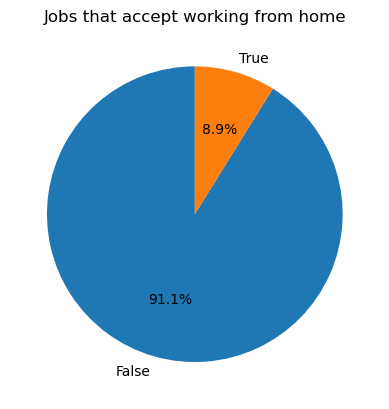

In [18]:
df.job_work_from_home.value_counts().plot(kind='pie', startangle=90, autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Jobs that accept working from home')
plt.show()

In [50]:
col_names = [
    ('job_work_from_home', 'Work From Home'),
    ('job_no_degree_mention', 'Degree Required'),
    ('job_health_insurance', 'Health Insurance')
]

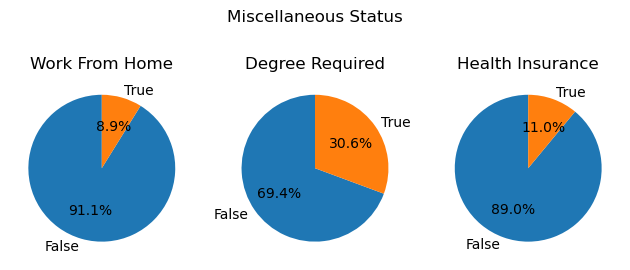

In [65]:
fig, ax = plt.subplots(1,3)

for i, (col,title) in enumerate(col_names):
    df[col].value_counts().plot(kind='pie', ax = ax[i], startangle=90, autopct='%1.1f%%', title=title)
    ax[i].set_ylabel('')

plt.suptitle('Miscellaneous Status', y=0.8)
plt.tight_layout()
plt.show()